In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

In [2]:
source_dir = "/Users/johnmays/Documents/Wirth Lab/convection-cell-research/data/LBC_images"
os.chdir(source_dir)

In [4]:
image = Image.open('frame65.png')
width, height = image.size

In [43]:
intensity_distribution = np.zeros(255, int)
intensity_values = np.zeros(width*height, int)

In [44]:
for row in range(width):
    for col in range(height):
        gray_value = image.getpixel((row,col))[0]
        intensity_values[height*row+col] = gray_value
        intensity_distribution[gray_value] += 1

In [45]:
graphfont = {'fontname':'Consolas'}

In [46]:
# np.linspace(0,1,255)

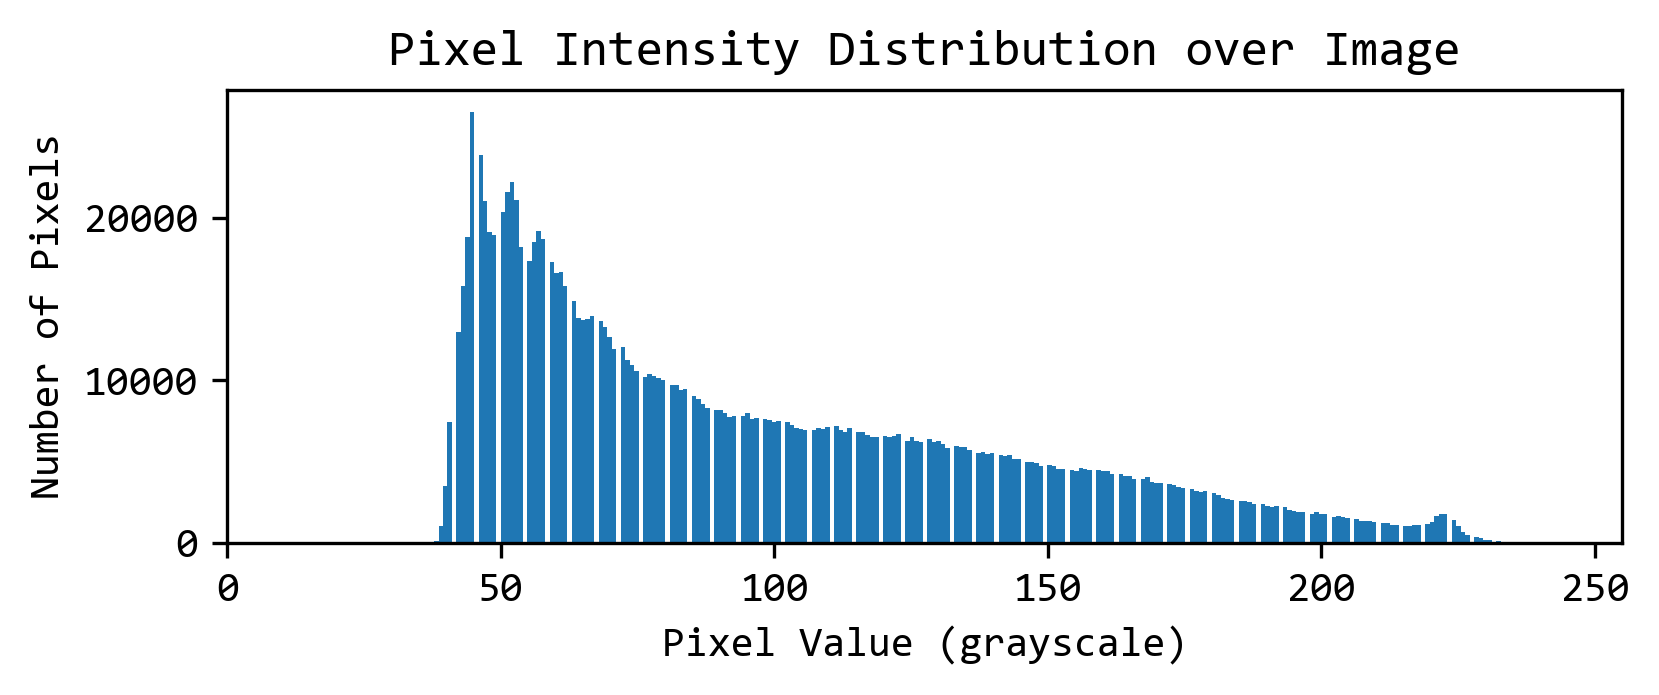

In [52]:
plt.figure(figsize=(6,2), dpi=300)
plt.hist(intensity_values,256)
plt.title("Pixel Intensity Distribution over Image", **graphfont)
plt.xlabel("Pixel Value (grayscale)", **graphfont)
plt.ylabel("Number of Pixels", **graphfont)
plt.xticks(**graphfont)
plt.yticks(**graphfont)
plt.xlim(0,255)
plt.show()

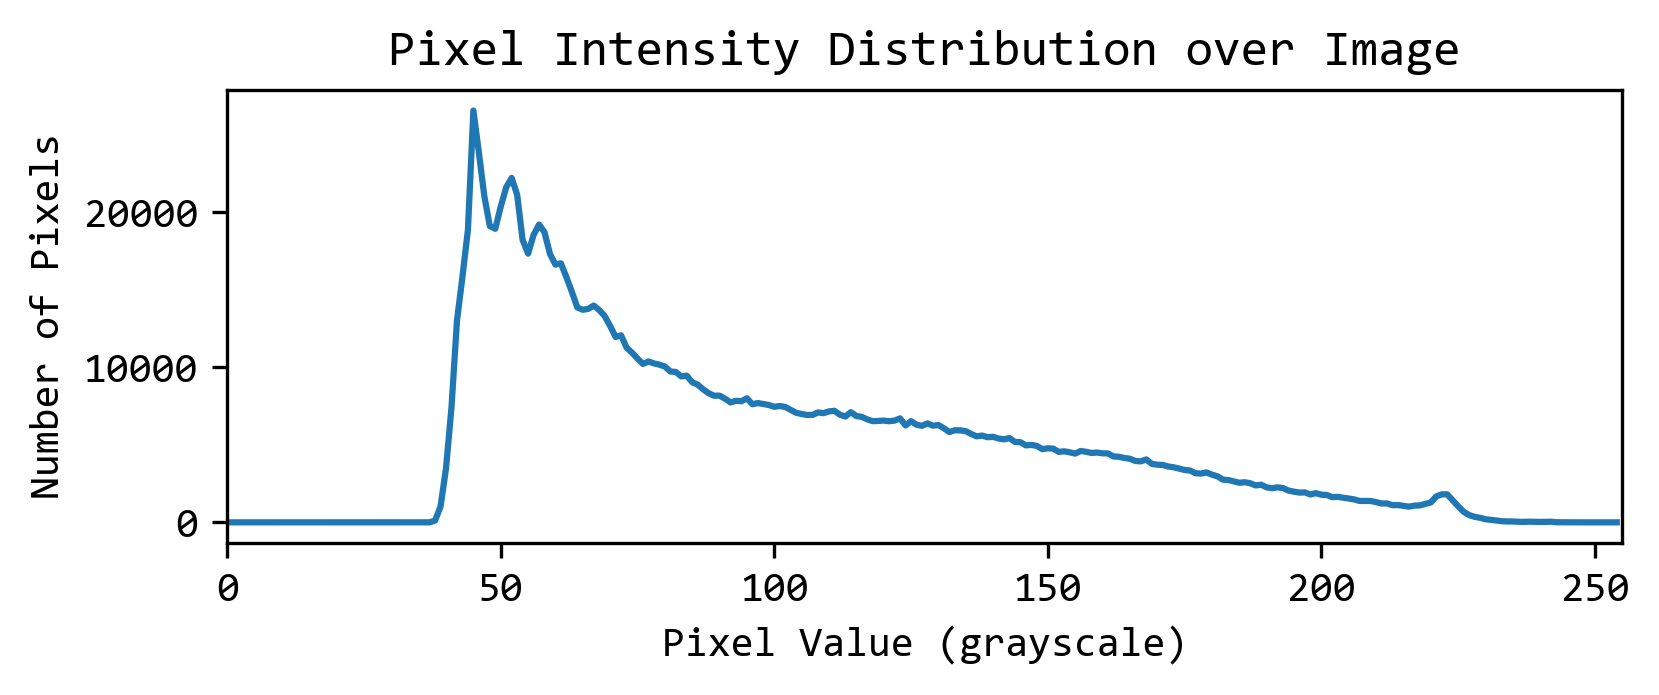

In [53]:
plt.figure(figsize=(6,2), dpi=300)
plt.plot(intensity_distribution)
plt.title("Pixel Intensity Distribution over Image", **graphfont)
plt.xlabel("Pixel Value (grayscale)", **graphfont)
plt.ylabel("Number of Pixels", **graphfont)
plt.xticks(**graphfont)
plt.xlim(0,255)
plt.yticks(**graphfont)
plt.show()